In [48]:
import numpy as np                                              #importing all the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso,LassoCV,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor

In [49]:
BB_df = pd.read_csv('Baseball.csv')                          #loading the dataset
BB_df

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

In [50]:
BB_df.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

In [51]:
BB_df.tail()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
25  92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26  84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27  79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28  74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29  68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV   E  
25   21  47  75  
26   18  41  78  
27   12  44  86  
28    6  41  92  
29    4  36  95

# Data Exploration

In [52]:
BB_df.shape

(30, 17)

In [53]:
BB_df.columns                               #Checking the different columns present.


Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [54]:
BB_df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

It is observed that there is only numerical data is present in the dataset.

In [55]:
BB_df.isnull()

W      R     AB      H     2B     3B     HR     BB     SO     SB  \
0   False  False  False  False  False  False  False  False  False  False   
1   False  False  False  False  False  False  False  False  False  False   
2   False  False  False  False  False  False  False  False  False  False   
3   False  False  False  False  False  False  False  False  False  False   
4   False  False  False  False  False  False  False  False  False  False   
5   False  False  False  False  False  False  False  False  False  False   
6   False  False  False  False  False  False  False  False  False  False   
7   False  False  False  False  False  False  False  False  False  False   
8   False  False  False  False  False  False  False  False  False  False   
9   False  False  False  False  False  False  False  False  False  False   
10  False  False  False  False  False  False  False  False  False  False   
11  False  False  False  False  False  False  False  False  False  False   
12  False  False  False  False  False  False  False  False  False  False   
13  False  False  False  False  False  False  False  False  False  False   
14  False  False  False  False  False  False  False  False  False  False   
15  False  False  False  False  False  False  False  False  False  False   
16  False  False  False  False  False  False  False  False  False  False   
17  False  False  False  False  False  False  False  False  False  False   
18  False  False  False  False  False  False  False  False  False  False   
19  False  False  False  False  False  False  False  False  False  False   
20  False  False  False  False  False  False  False  False  False  False   
21  False  False  False  False  False  False  False  False  False  False   
22  False  False  False  False  False  False  False  False  False  False   
23  False  False  False  False  False  False  False  False  False  False   
24  False  False  False  False  False  False  False  False  False  False   
25  False  False  False  False  False  False  False  False  False  False   
26  False  False  False  False  False  False  False  False  False  False   
27  False  False  False  False  False  False  False  False  False  False   
28  False  False  False  False  False  False  False  False  False  False   
29  False  False  False  False  False  False  False  False  False  False   

       RA     ER    ERA     CG    SHO     SV      E  
0   False  False  False  False  False  False  False  
1   False  False  False  False  False  False  False  
2   False  False  False  False  False  False  False  
3   False  False  False  False  False  False  False  
4   False  False  False  False  False  False  False  
5   False  False  False  False  False  False  False  
6   False  False  False  False  False  False  False  
7   False  False  False  False  False  False  False  
8   False  False  False  False  False  False  False  
9   False  False  False  False  False  False  False  
10  False  False  False  False  False  False  False  
11  False  False  False  False  False  False  False  
12  False  False  False  False  False  False  False  
13  False  False  False  False  False  False  False  
14  False  False  False  False  False  False  False  
15  False  False  False  False  False  False  False  
16  False  False  False  False  False  False  False  
17  False  False  False  False  False  False  False  
18  False  False  False  False  False  False  False  
19  False  False  False  False  False  False  False  
20  False  False  False  False  False  False  False  
21  False  False  False  False  False  False  False  
22  False  False  False  False  False  False  False  
23  False  False  False  False  False  False  False  
24  False  False  False  False  False  False  False  
25  False  False  False  False  False  False  False  
26  False  False  False  False  False  False  False  
27  False  False  False  False  False  False  False  
28  False  False  False  False  False  False  False  
29  False  False  False  False 

In [56]:
BB_df.isnull().sum()                      #There is no null value present in the dataset

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Text(0.5, 1.0, 'Null values')

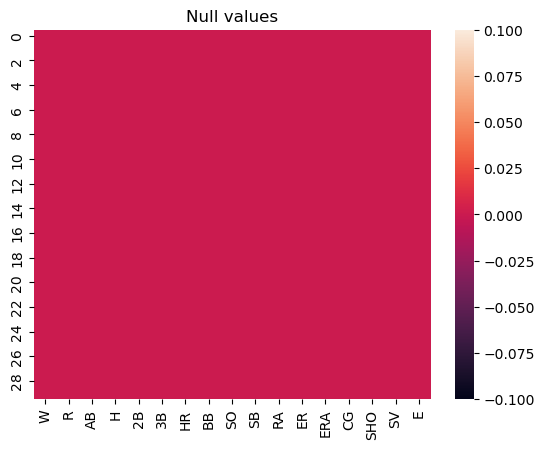

In [57]:
sns.heatmap(BB_df.isnull())
plt.title("Null values")                                                        #visual presentation of null values

In [58]:
BB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


With the help of above function we can get the detailed information about the data like Range index,Colunm name, non-null count, data type and memory usage.

In [59]:
BB_df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [60]:
BB_df.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

After doing all the required changes in the dataset and as there no negative values present in the dataset it looks good to continue the data analysing. Following observations can be done on the bases of describe function. i Count of all the coulumns are equal. ii Right skewness of data is present because in few columns as mean is more than median. iii Left skewness of data is also there because in few columns as median is more than mean.iv There are also chances of outlier in some columns becasuse there is major difference in the values of 75% and max in some columns like H,SO,SB,CG,SV.

<Axes: >

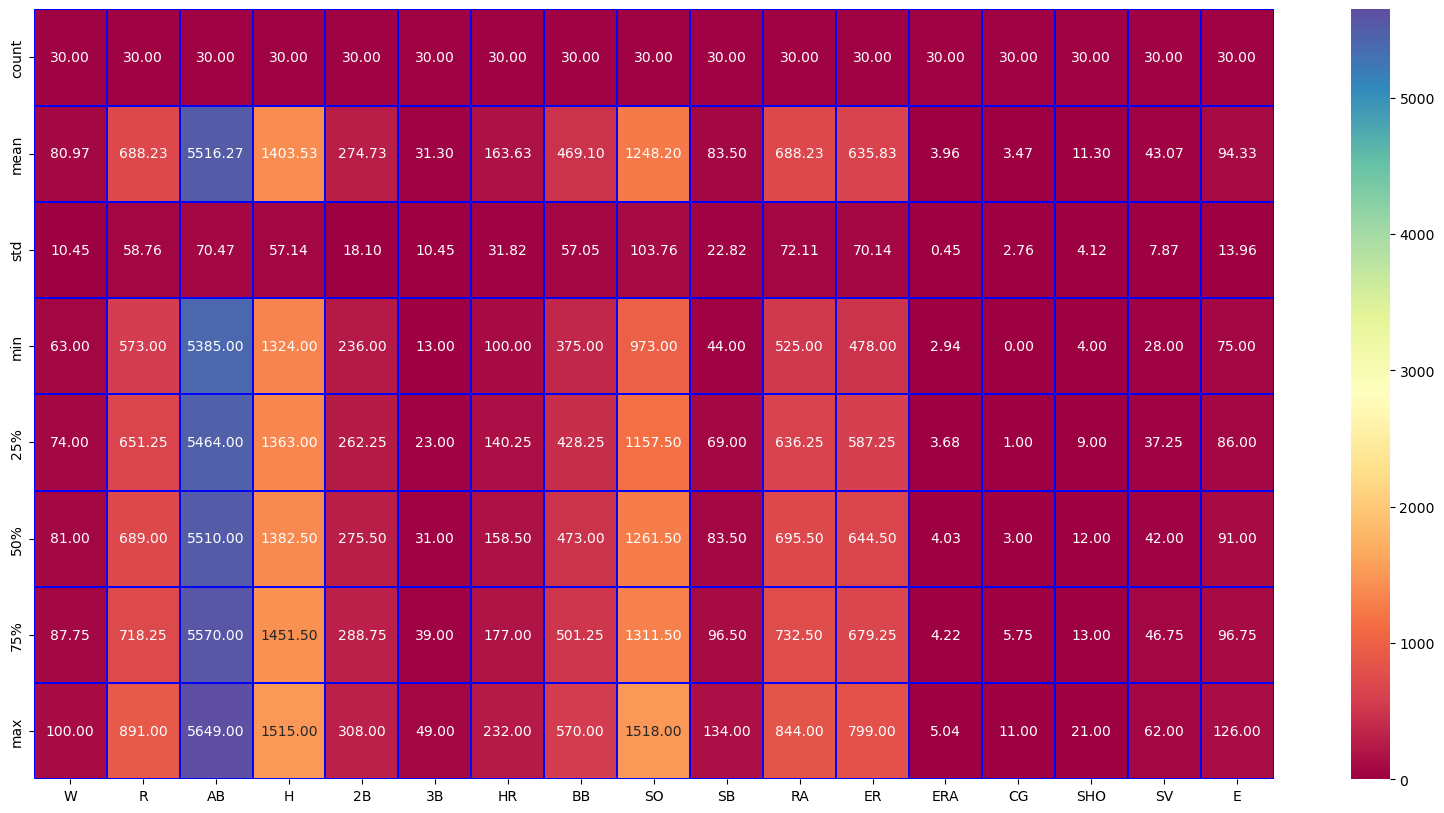

In [61]:
plt.figure(figsize=(20,10))
sns.heatmap(BB_df.describe(),linewidth=0.3,annot=True,linecolor='blue',cmap='Spectral',fmt="0.2f")

DATA VISUALIZATION Various graphs are used to in order to understand how the data is distributed,it's skweness, scattered.



Text(0.5, 1.0, 'Distribution of Wins')

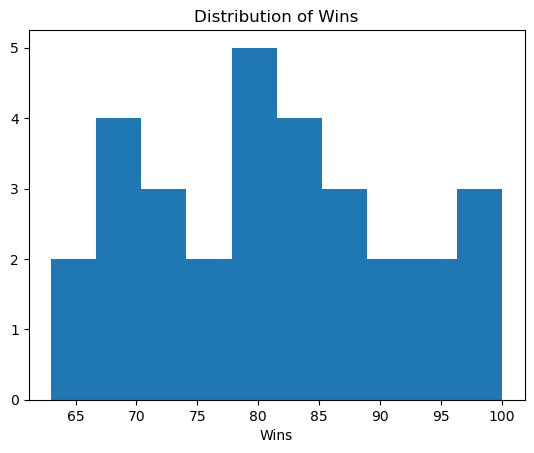

In [62]:
plt.hist(BB_df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


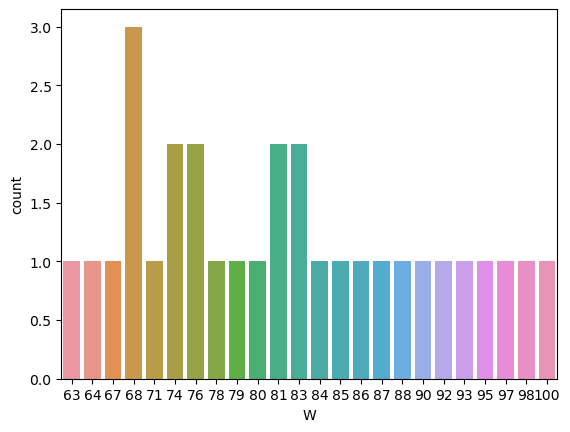

In [63]:
print(BB_df['W'].value_counts())
ax=sns.countplot(x='W',data=BB_df)

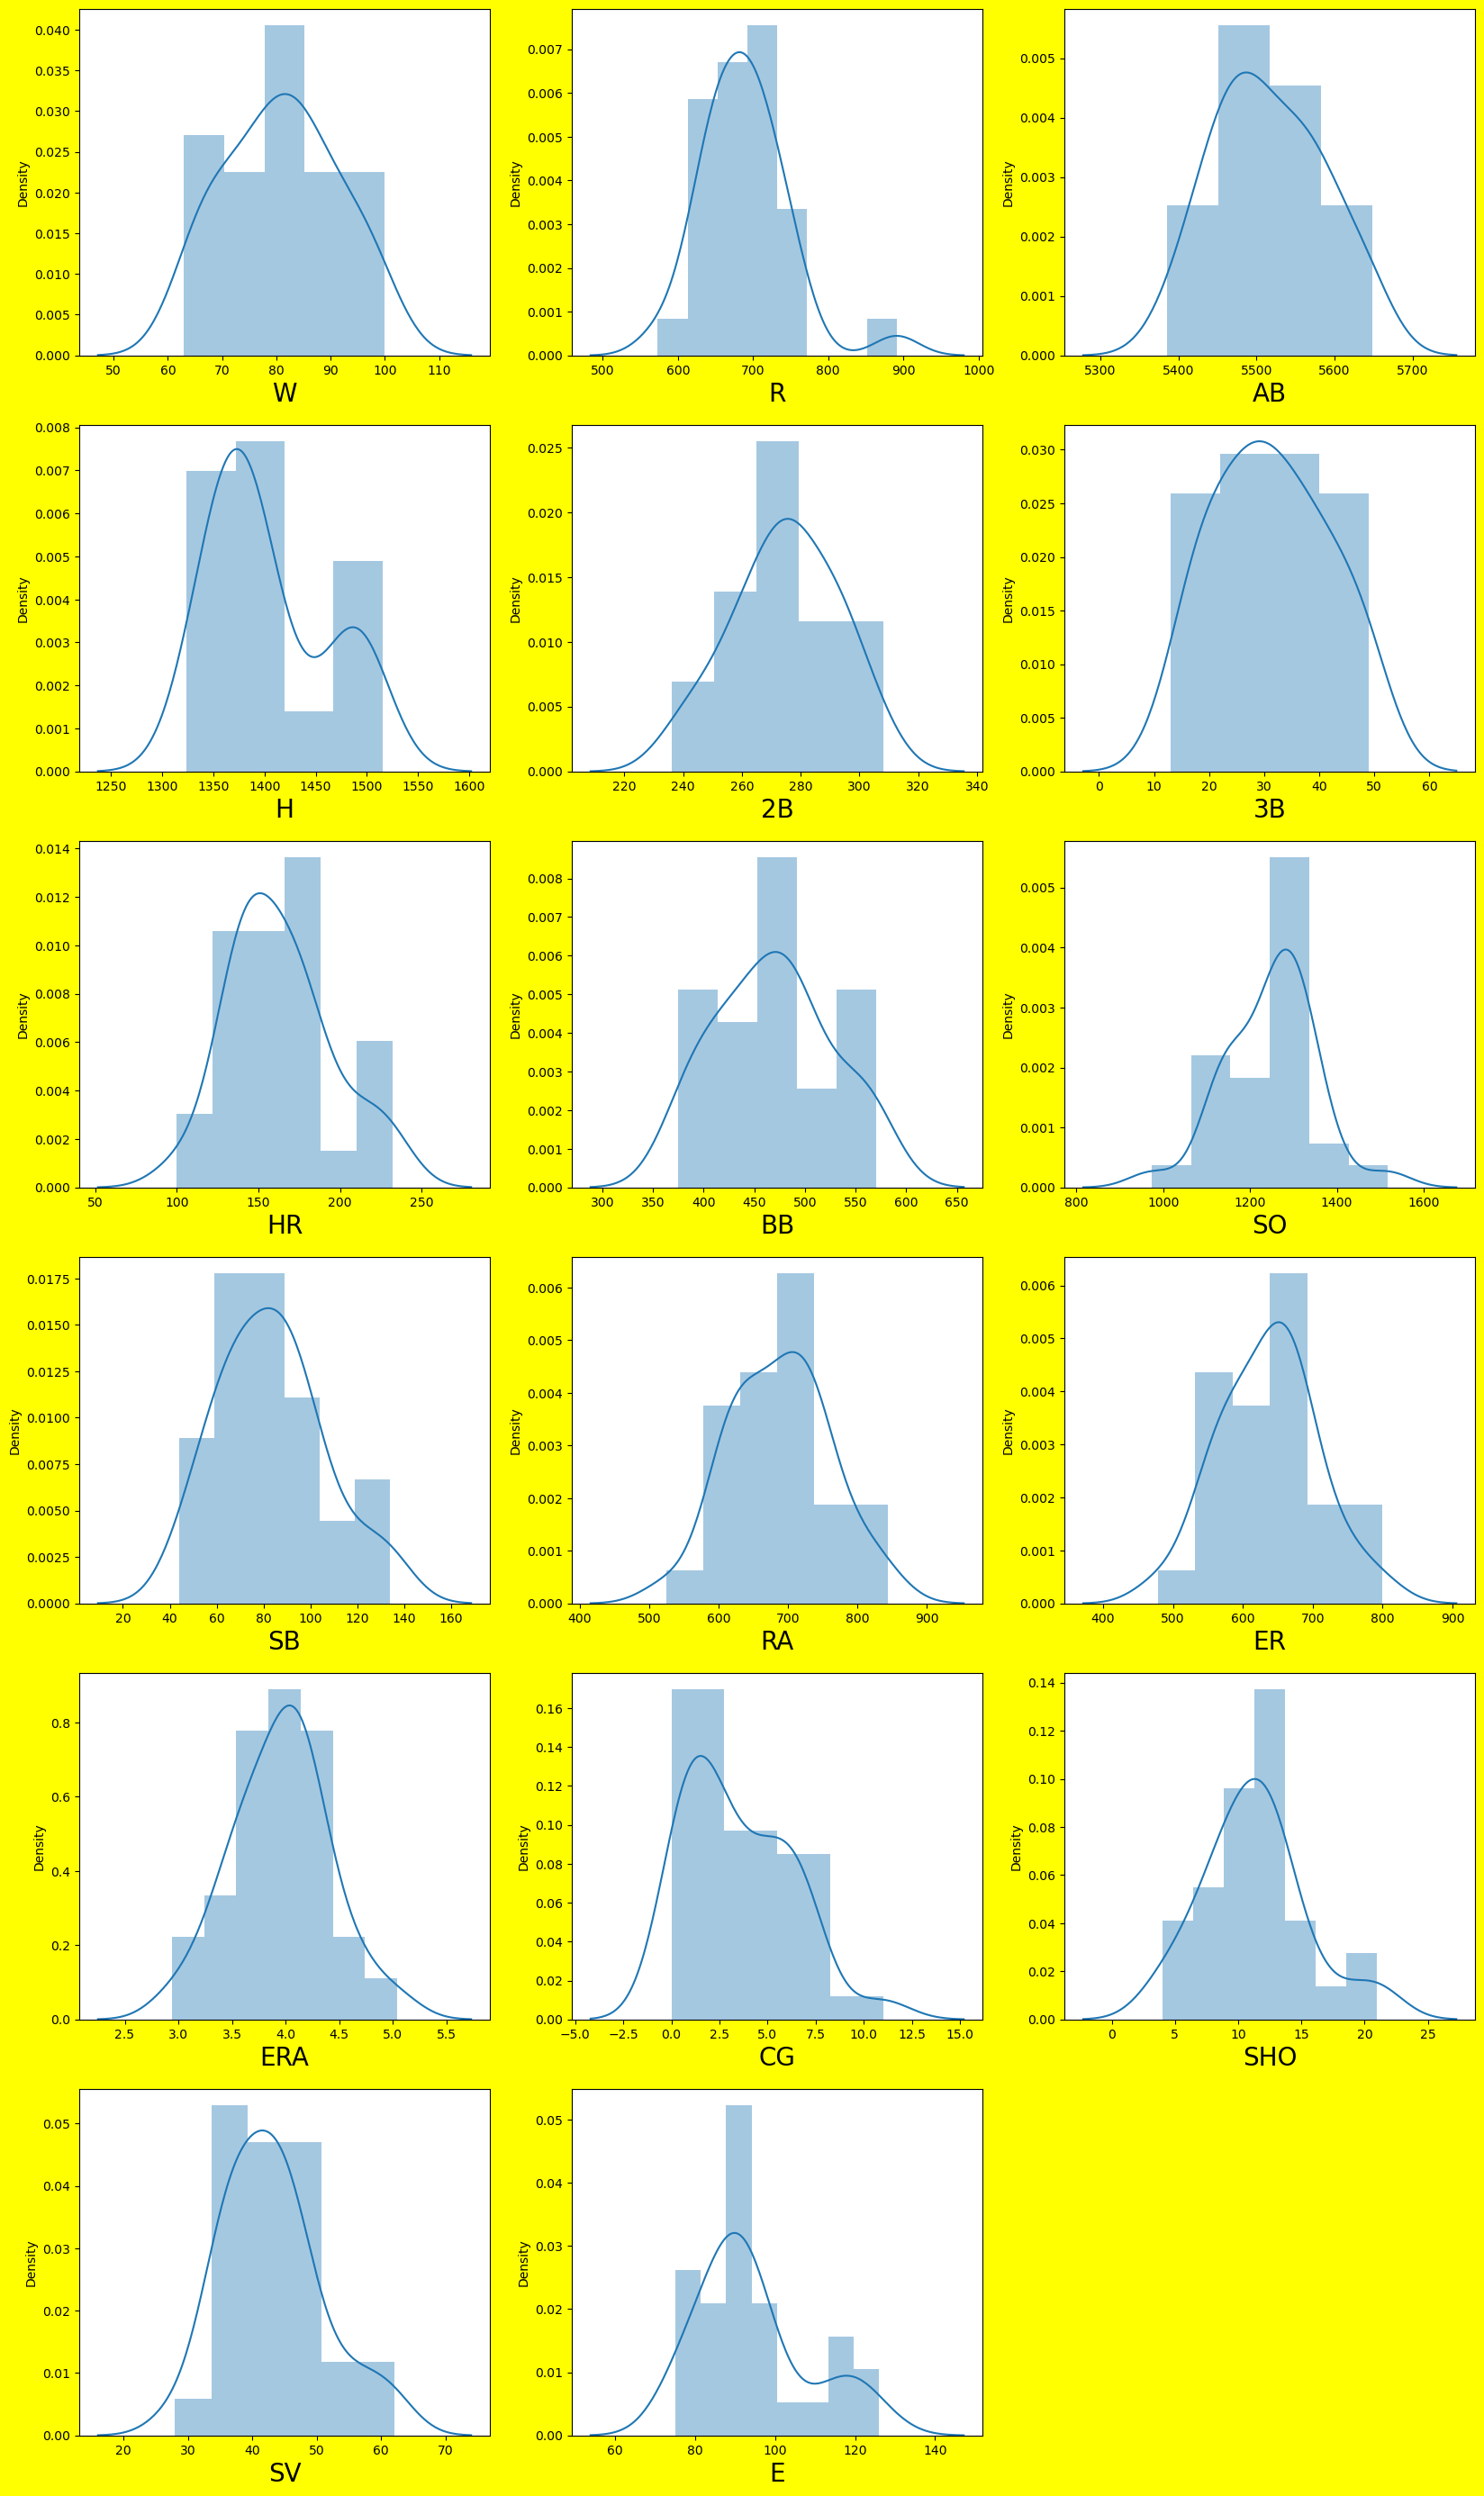

In [64]:
plt.figure(figsize=(20,35),facecolor='yellow')
plotnumber= 1

for column in BB_df:
    if plotnumber<=17:
        ax= plt.subplot(6,3,plotnumber)
        sns.distplot(BB_df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

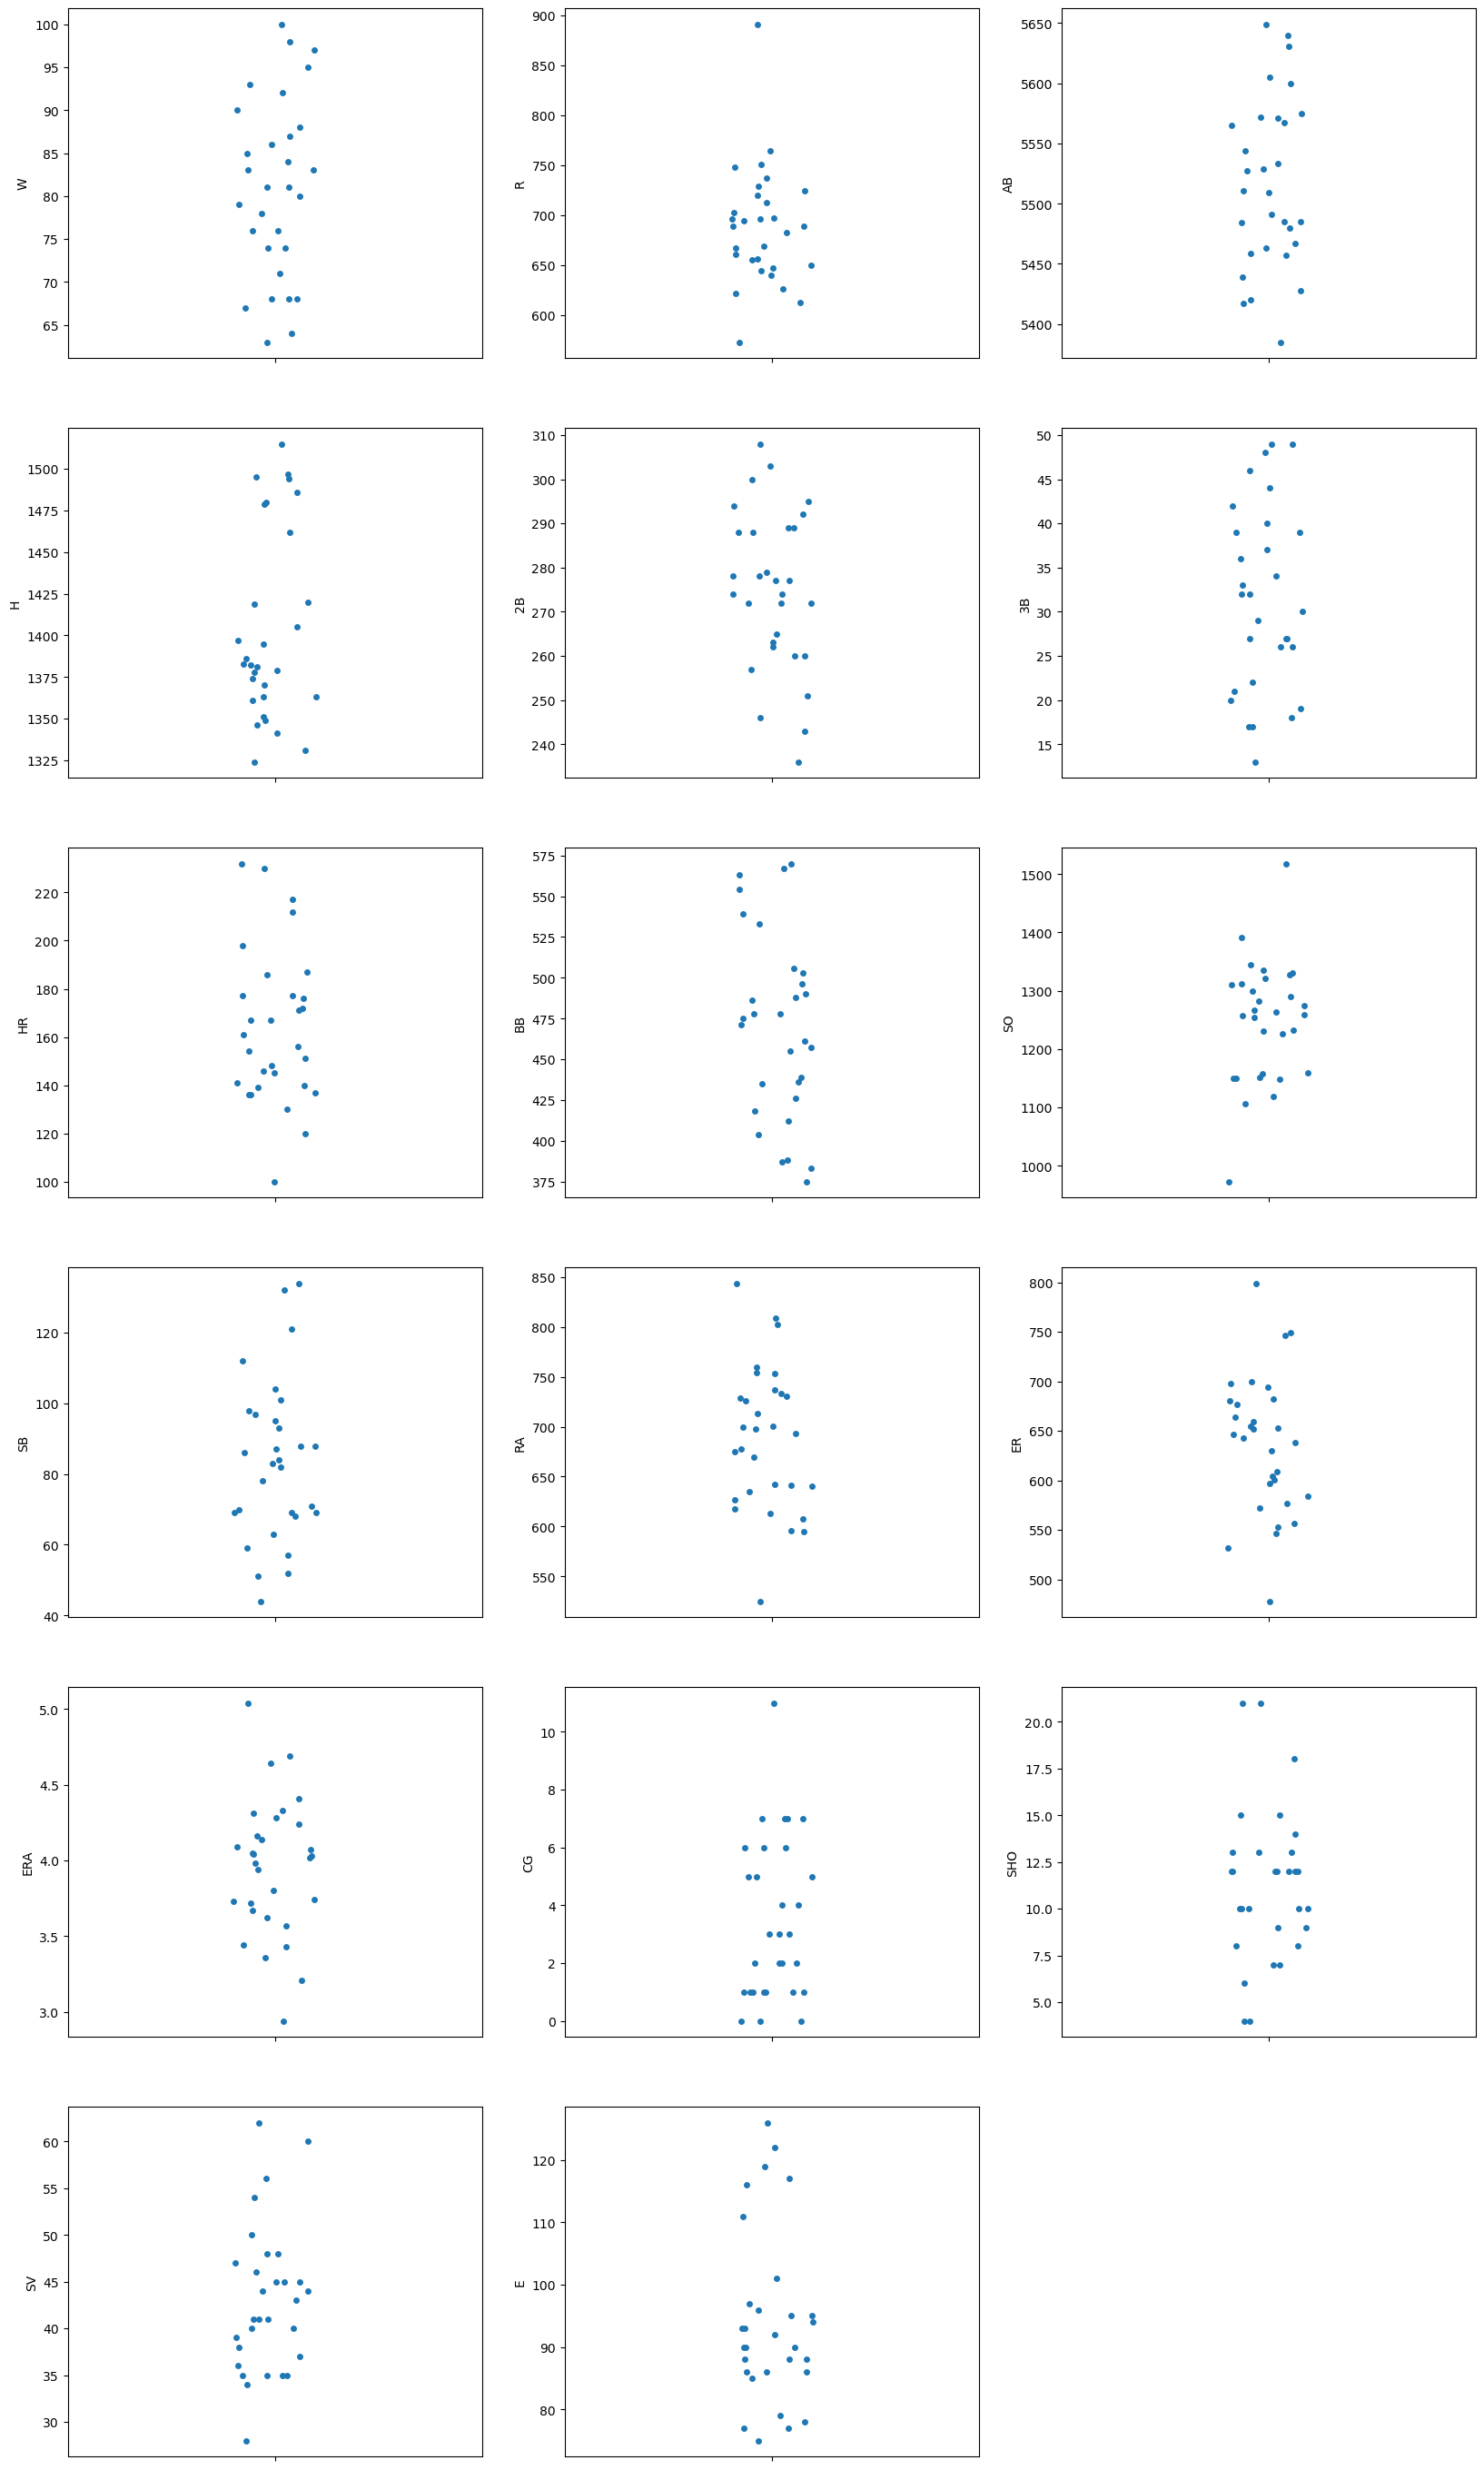

In [65]:
plt.figure(figsize=(20,35))
plotnumber = 1

for column in BB_df:
    if plotnumber<=17:
        ax= plt.subplot(6,3,plotnumber)
        sns.stripplot(BB_df[column]) 
    plotnumber+=1
plt.show()

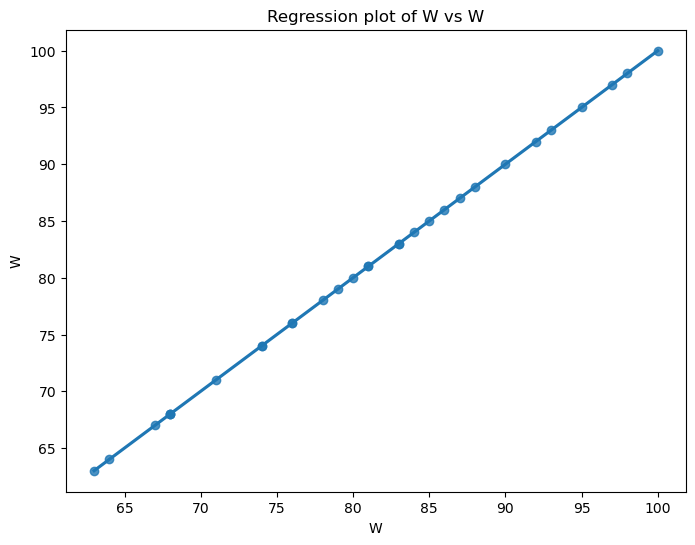

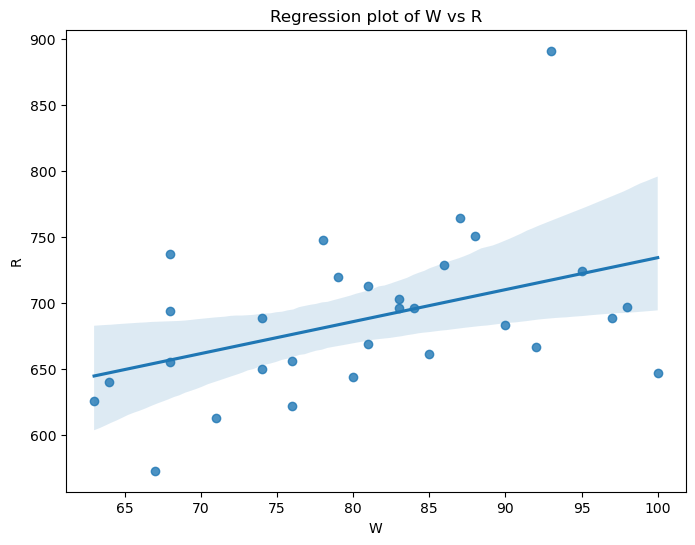

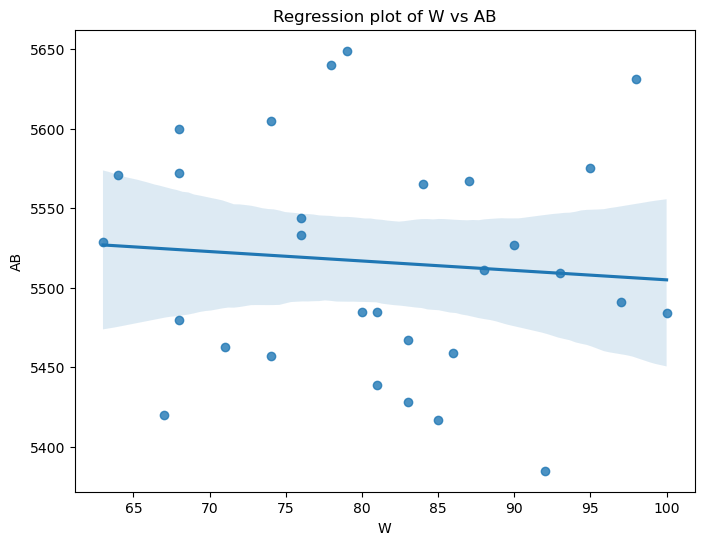

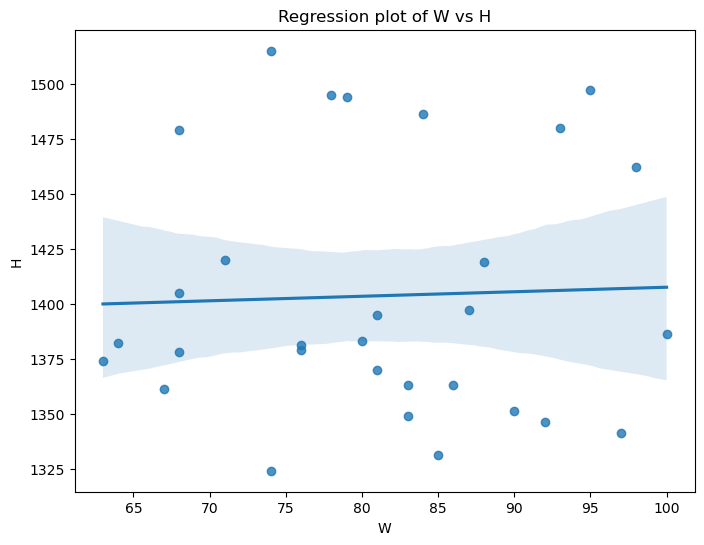

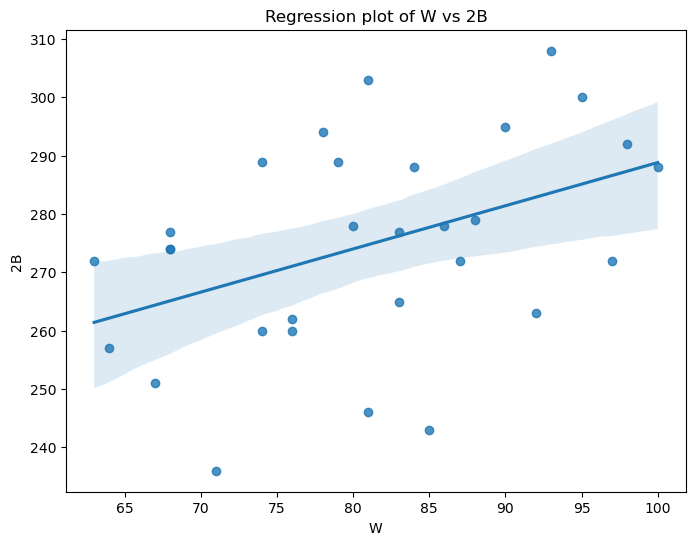

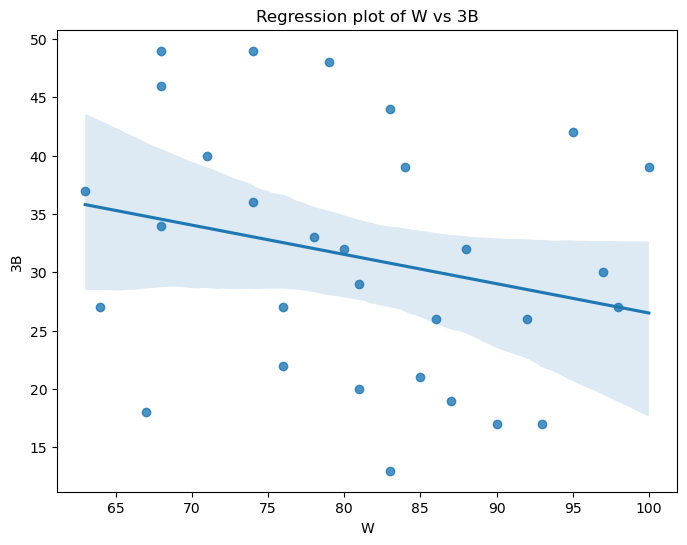

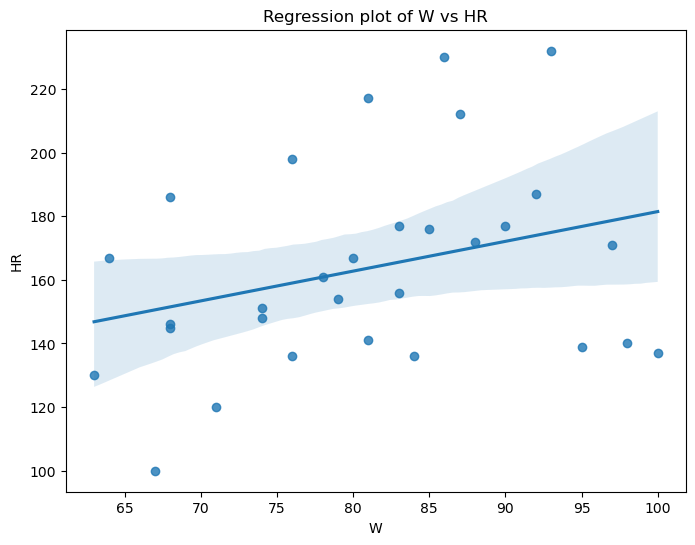

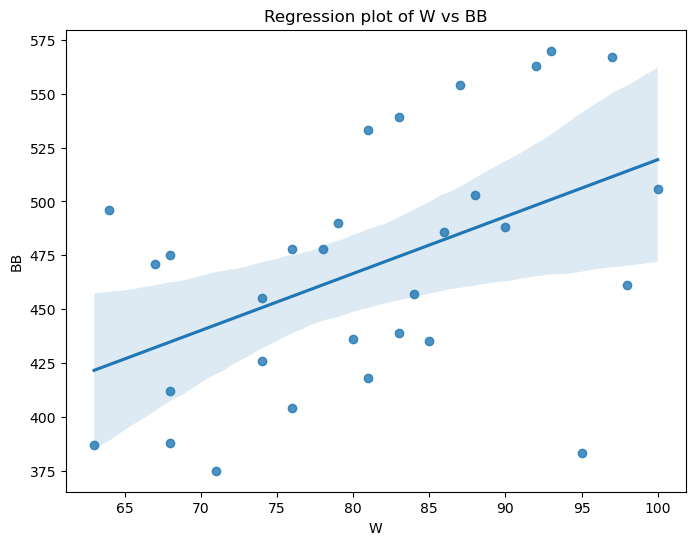

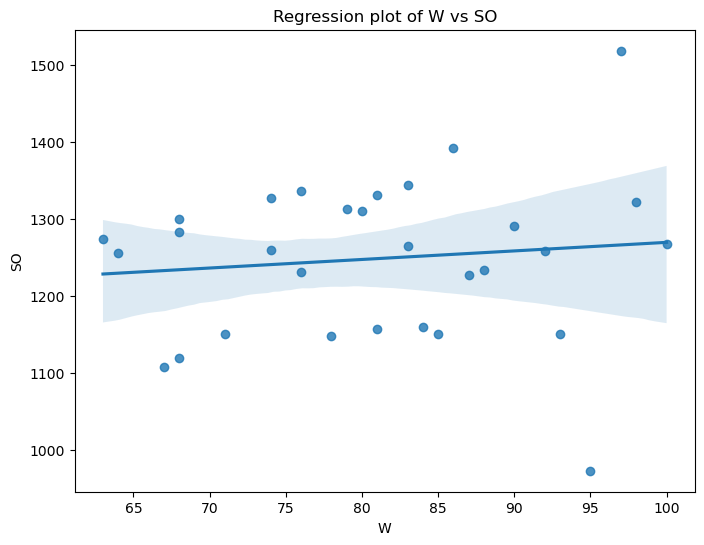

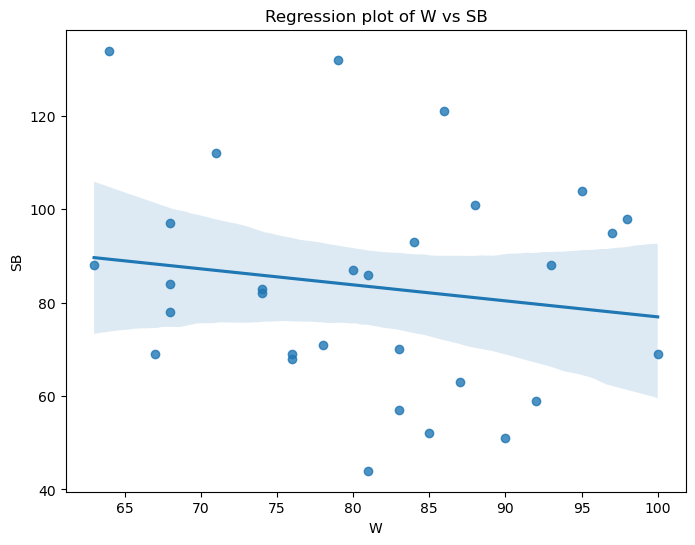

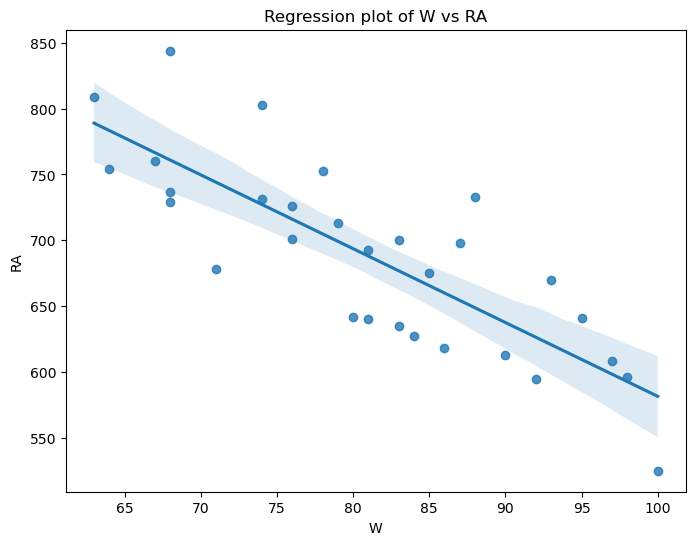

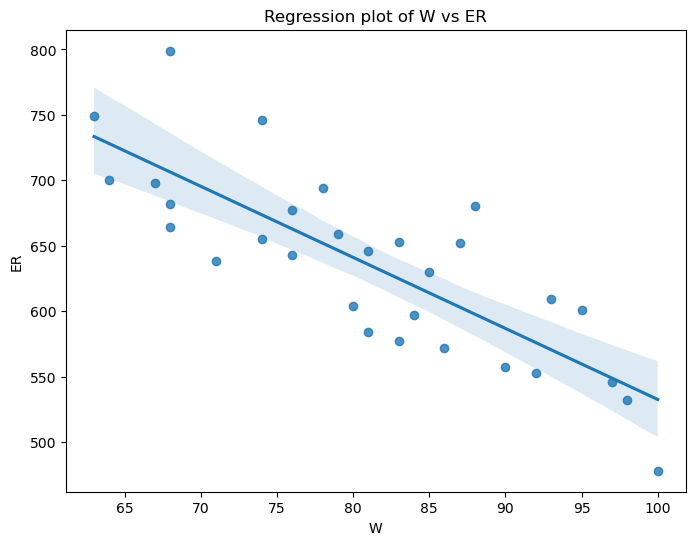

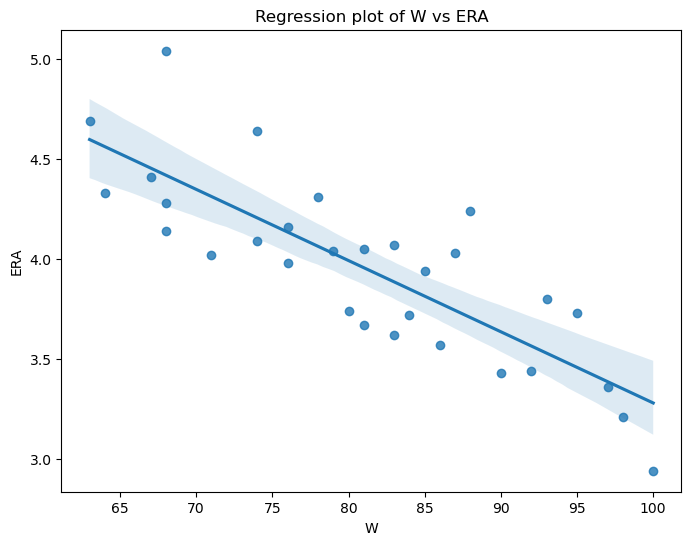

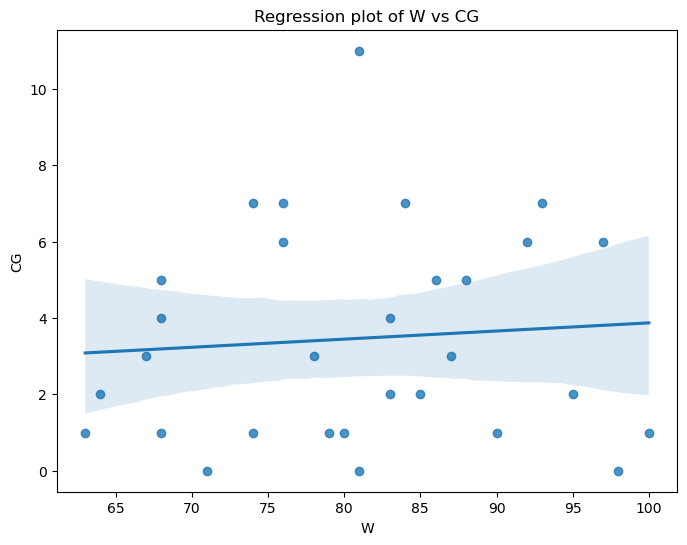

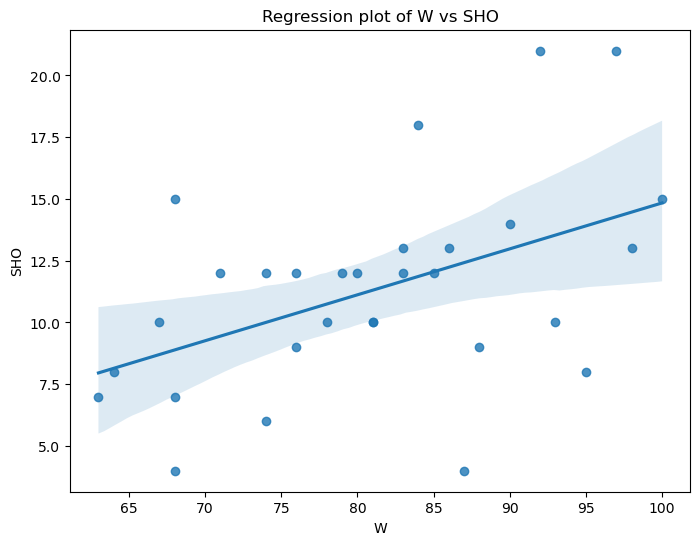

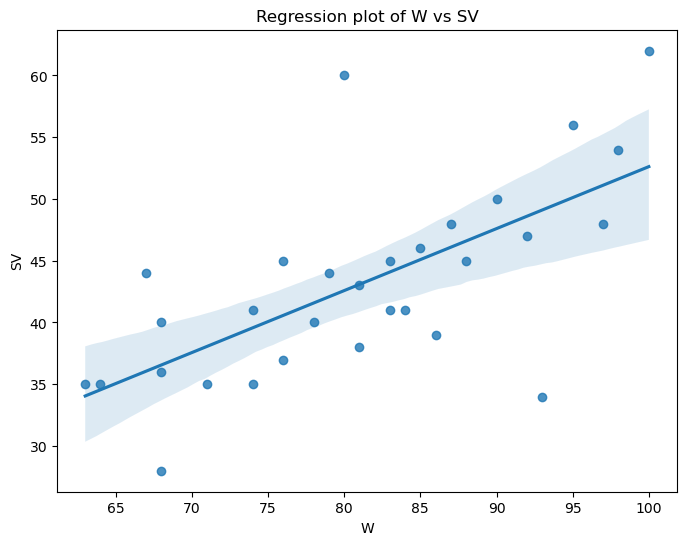

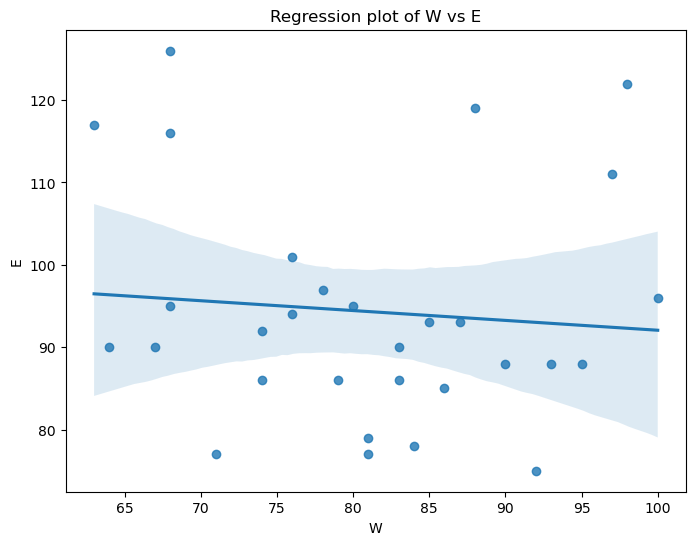

In [66]:
for column in BB_df:
    plt.figure(figsize=(8, 6))
    sns.regplot(x='W', y=column, data=BB_df)
    plt.title(f'Regression plot of W vs {column}')
plt.show()

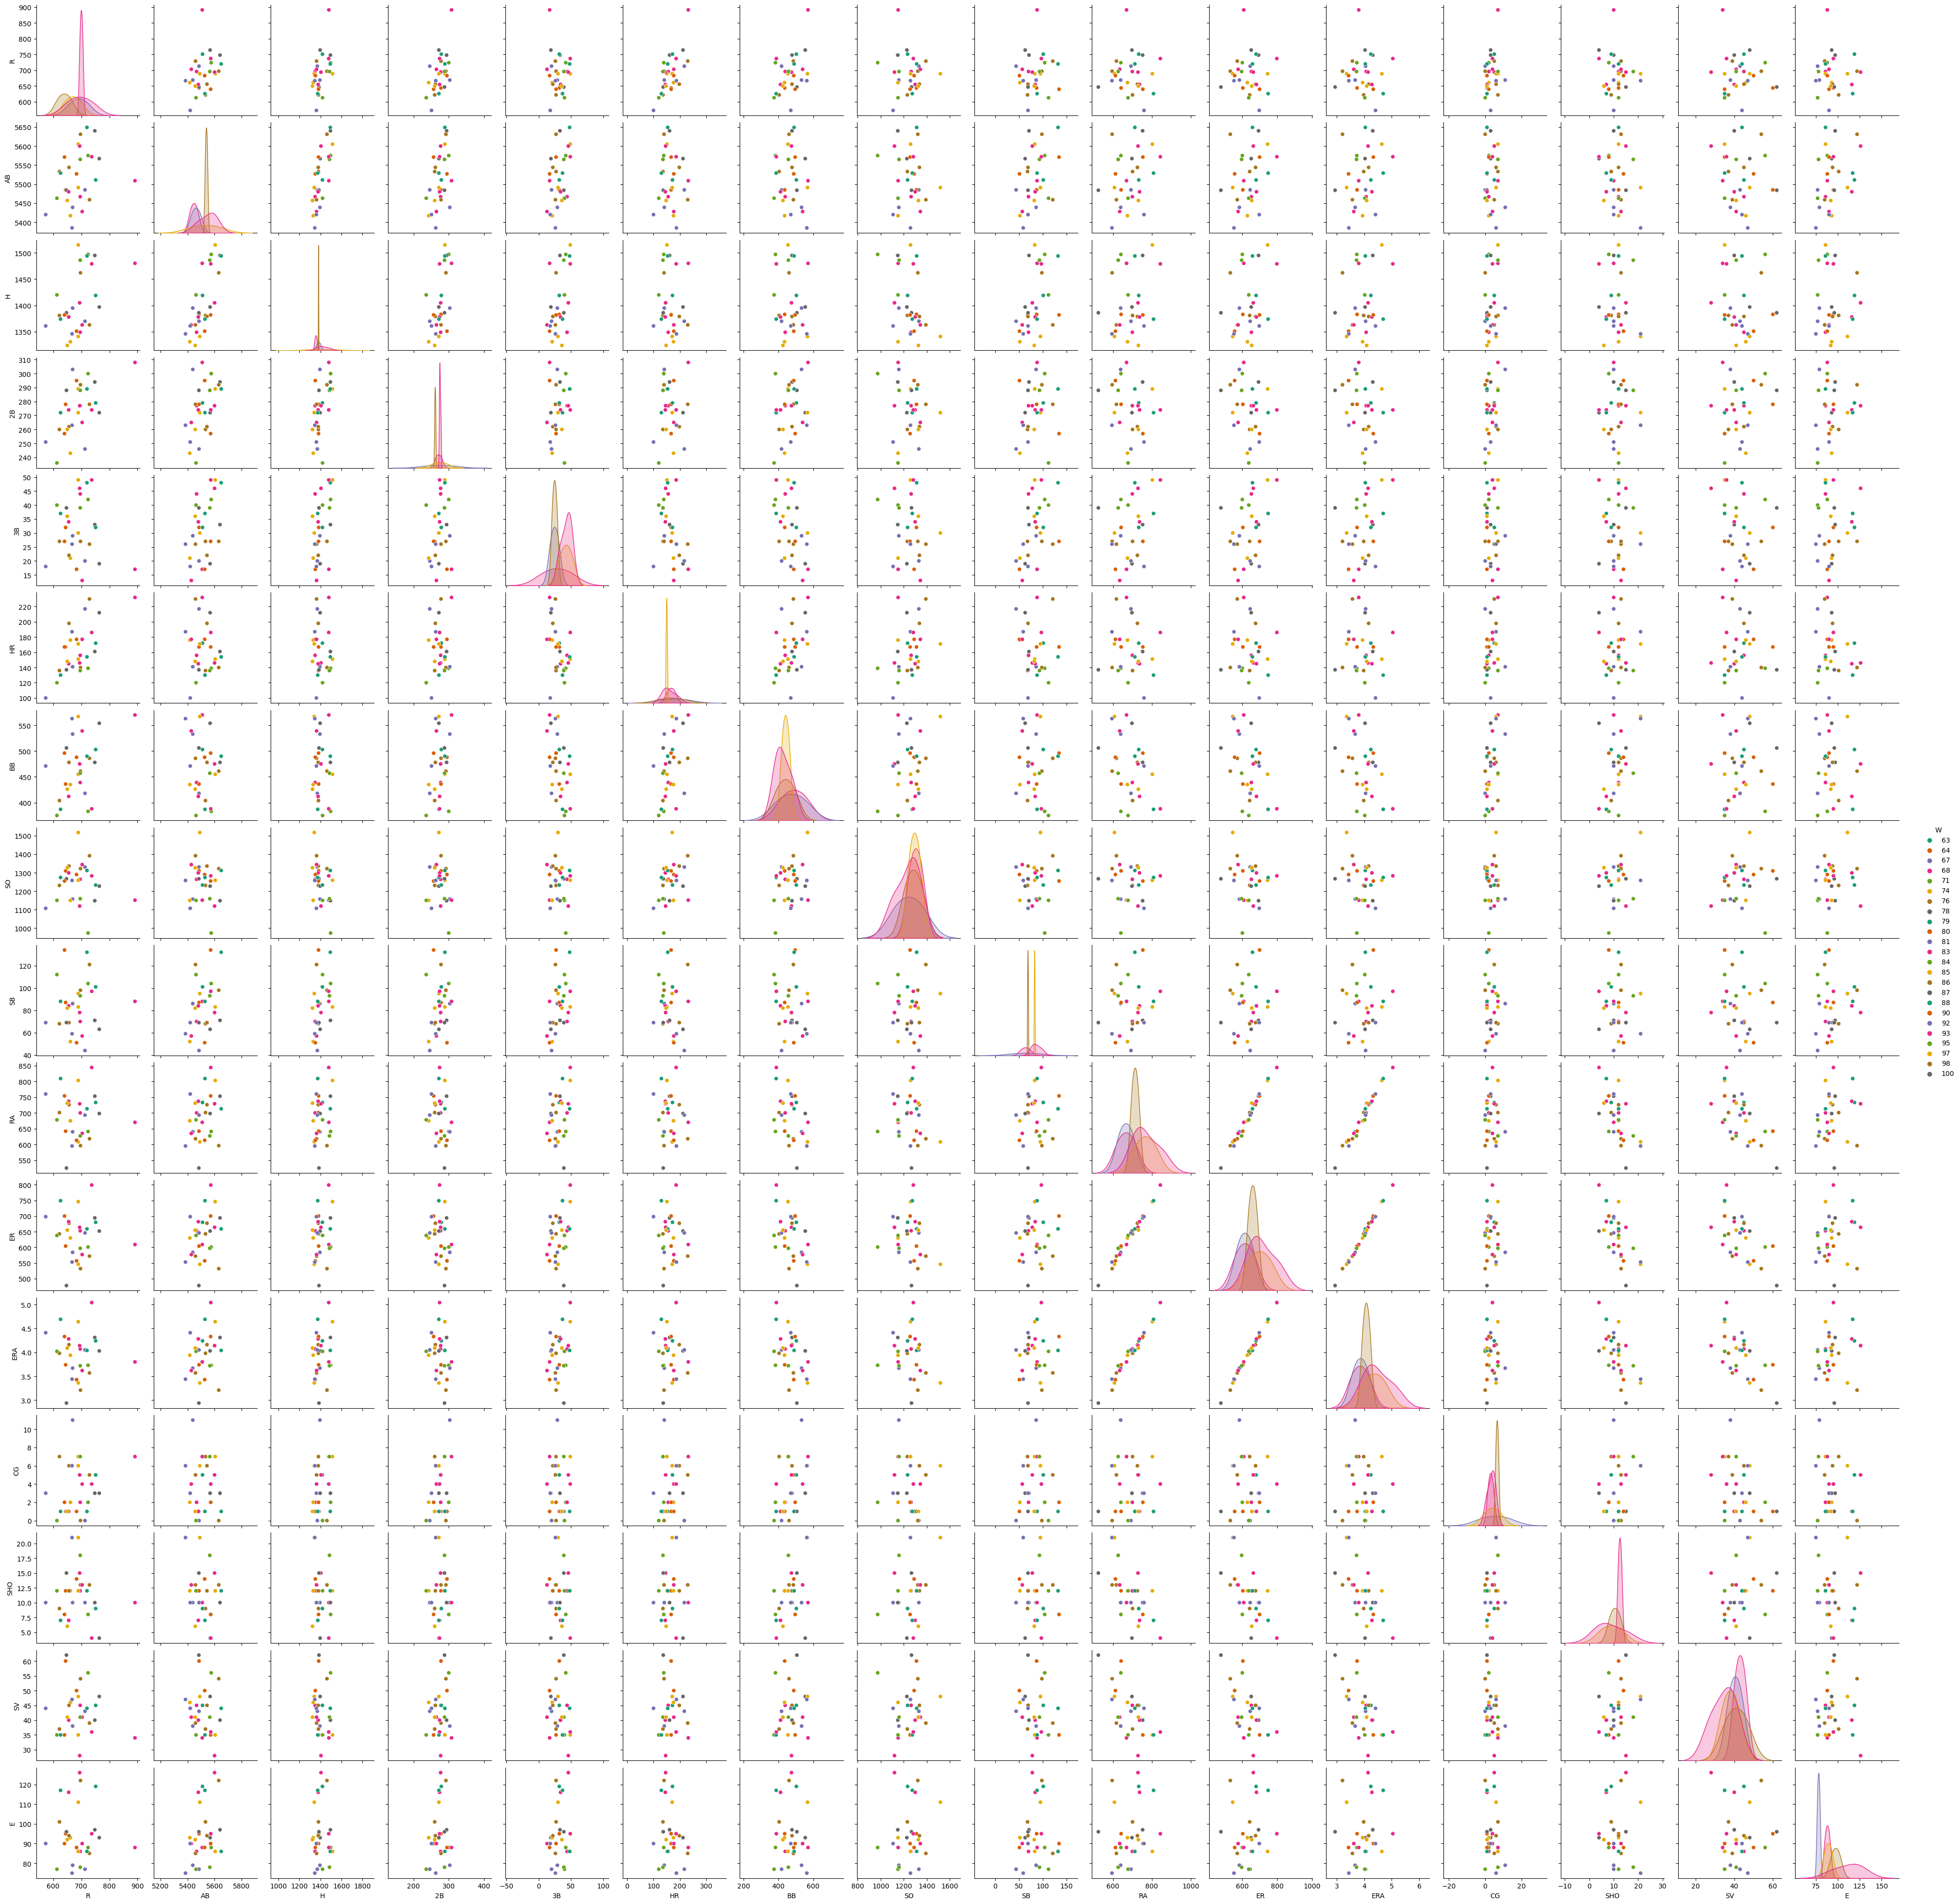

In [67]:
sns.pairplot(BB_df, hue ='W',palette = 'Dark2')
plt.show()

W          Axes(0.125,0.77;0.227941x0.11)
R       Axes(0.398529,0.77;0.227941x0.11)
AB      Axes(0.672059,0.77;0.227941x0.11)
H         Axes(0.125,0.638;0.227941x0.11)
2B     Axes(0.398529,0.638;0.227941x0.11)
3B     Axes(0.672059,0.638;0.227941x0.11)
HR        Axes(0.125,0.506;0.227941x0.11)
BB     Axes(0.398529,0.506;0.227941x0.11)
SO     Axes(0.672059,0.506;0.227941x0.11)
SB        Axes(0.125,0.374;0.227941x0.11)
RA     Axes(0.398529,0.374;0.227941x0.11)
ER     Axes(0.672059,0.374;0.227941x0.11)
ERA       Axes(0.125,0.242;0.227941x0.11)
CG     Axes(0.398529,0.242;0.227941x0.11)
SHO    Axes(0.672059,0.242;0.227941x0.11)
SV         Axes(0.125,0.11;0.227941x0.11)
E       Axes(0.398529,0.11;0.227941x0.11)
dtype: object

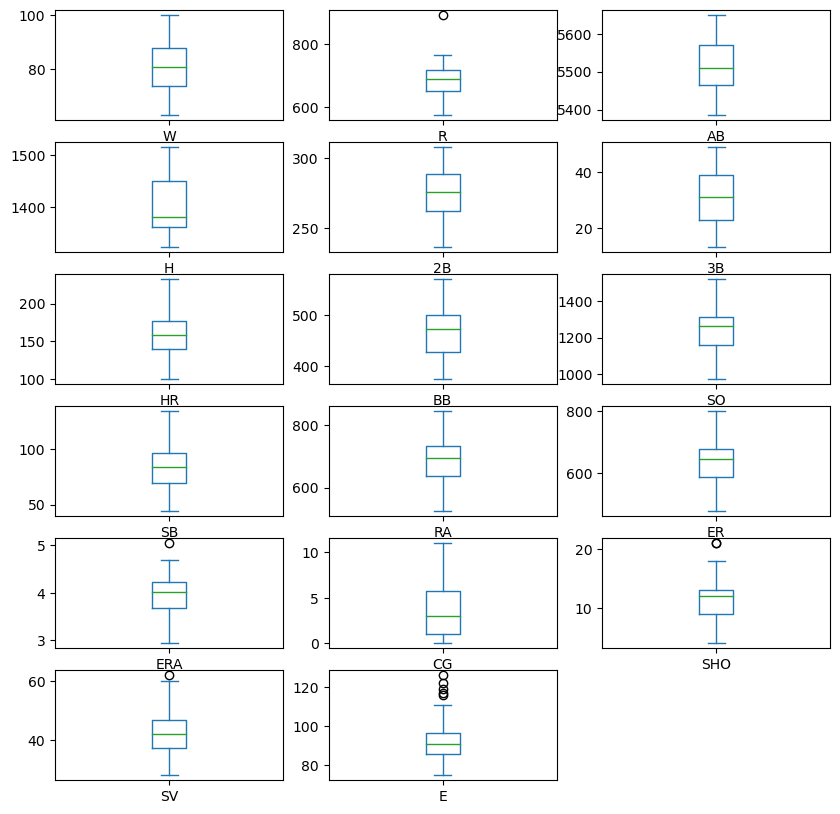

In [68]:
BB_df.plot(kind='box',subplots=True,layout=(6,3),figsize=(10,10))    #checking the outliers

In [69]:
from scipy.stats import zscore
out_liers=BB_df[['E','R','ERA','SHO','SV']]
z=np.abs(zscore(out_liers))
z

E         R       ERA       SHO        SV
0   0.461470  0.619078  0.506955  0.814629  1.671607
1   0.607197  0.134432  0.254598  0.172800  0.249879
2   1.117242  0.332906  0.641347  0.320914  0.654856
3   0.485758  1.146419  0.053010  0.567771  0.784104
4   0.607197  0.013270  1.531318  0.172800  1.042600
5   0.461470  3.509647  0.350165  0.320914  1.171848
6   0.097152  1.311430  0.165003  1.802057  0.637623
7   1.262970  0.428681  0.209800  0.320914  0.008617
8   0.048576  0.765626  0.484557  0.172800  2.188598
9   0.194303  1.034489  0.792164  0.320914  0.396360
10  1.797303  1.086415  0.635374  0.567771  0.249879
11  0.680061  0.705622  0.865333  0.419657  0.525608
12  0.097152  0.471376  0.036584  0.172800  0.379127
13  0.024288  0.557920  0.456185  0.172800  0.249879
14  2.307348  0.099814  0.411388  0.913371  1.947335
15  0.121439  0.713699  2.276445  0.913371  2.447094
16  2.015894  0.151740  1.671683  0.419657  1.413111
17  1.214394  0.013270  1.335704  2.394514  0.637623
18  1.578712  0.575229  0.724968  1.061486  0.396360
19  0.315742  0.834861  0.836961  0.814629  1.042600
20  0.461470  0.090583  1.178913  0.666514  0.896119
21  0.315742  0.255593  0.753340  0.419657  0.267112
22  1.262970  1.302198  0.142604  0.172800  1.042600
23  0.315742  1.994550  1.016150  0.320914  0.120631
24  1.651576  1.077184  1.643311  1.061486  1.042600
25  1.408697  0.367523  1.156515  2.394514  0.508375
26  1.190106  0.134432  0.529354  1.653943  0.267112
27  0.607197  0.549843  0.187402  0.172800  0.120631
28  0.170015  0.661773  0.299395  1.308343  0.267112
29  0.048576  0.844092  2.427263  1.802057  0.913352

In [70]:
np.where(z>3)

(array([5]), array([1]))

# checking the skewness 

In [71]:
BB_df.skew().sort_values(ascending=False)

R      1.200786
E      0.890132
CG     0.736845
H      0.670254
SV     0.657524
SHO    0.565790
HR     0.516441
SB     0.479893
AB     0.183437
BB     0.158498
3B     0.129502
ER     0.058710
ERA    0.053331
W      0.047089
RA     0.045734
SO    -0.156065
2B    -0.230650
dtype: float64

In [72]:
BB_df[['R','E','CG','H','SV','SHO','HR']]=np.cbrt(BB_df[['R','E','CG','H','SV','SHO','HR']])

In [73]:
BB_df.skew().sort_values(ascending=False)

R      0.892970
E      0.719735
H      0.642599
SB     0.479893
SV     0.325143
AB     0.183437
HR     0.175310
BB     0.158498
3B     0.129502
ER     0.058710
ERA    0.053331
W      0.047089
RA     0.045734
SO    -0.156065
2B    -0.230650
SHO   -0.280283
CG    -1.043632
dtype: float64

In [74]:
BB_df[['R','E','H']]=np.sqrt(BB_df[['R','E','H']])

In [75]:
BB_df.skew().sort_values(ascending=False)

R      0.818137
E      0.675255
H      0.635594
SB     0.479893
SV     0.325143
AB     0.183437
HR     0.175310
BB     0.158498
3B     0.129502
ER     0.058710
ERA    0.053331
W      0.047089
RA     0.045734
SO    -0.156065
2B    -0.230650
SHO   -0.280283
CG    -1.043632
dtype: float64

In [76]:
BB_df.corr()

W         R        AB         H        2B        3B        HR  \
W    1.000000  0.440955 -0.087947  0.035697  0.427797 -0.251118  0.315421   
R    0.440955  1.000000  0.335266  0.482290  0.565836 -0.049261  0.679226   
AB  -0.087947  0.335266  1.000000  0.739950  0.453370  0.435422 -0.044329   
H    0.035697  0.482290  0.739950  1.000000  0.566343  0.476943 -0.088564   
2B   0.427797  0.565836  0.453370  0.566343  1.000000  0.220490  0.071757   
3B  -0.251118 -0.049261  0.435422  0.476943  0.220490  1.000000 -0.401877   
HR   0.315421  0.679226 -0.044329 -0.088564  0.071757 -0.401877  1.000000   
BB   0.484342  0.397056 -0.136414 -0.117928  0.302700 -0.454949  0.424800   
SO   0.111850 -0.034719 -0.106022 -0.399977 -0.150752 -0.141196  0.379385   
SB  -0.157234  0.081163  0.372618  0.415330  0.195027  0.457437 -0.136425   
RA  -0.812952 -0.050015  0.316010  0.223552 -0.218160  0.314125 -0.106105   
ER  -0.809435 -0.047934  0.309686  0.252004 -0.235531  0.340225 -0.088020   
ERA -0.819600 -0.057237  0.255551  0.230719 -0.254854  0.330951 -0.095485   
CG   0.016041  0.224429 -0.063460  0.065985  0.320420 -0.023921  0.173937   
SHO  0.448869 -0.115327 -0.191654 -0.131615  0.070169 -0.058471 -0.046306   
SV   0.668831 -0.079551 -0.124750 -0.145910  0.153246 -0.171121  0.000414   
E   -0.090112 -0.016835  0.321420 -0.032566  0.109139  0.117191 -0.180563   

           BB        SO        SB        RA        ER       ERA        CG  \
W    0.484342  0.111850 -0.157234 -0.812952 -0.809435 -0.819600  0.016041   
R    0.397056 -0.034719  0.081163 -0.050015 -0.047934 -0.057237  0.224429   
AB  -0.136414 -0.106022  0.372618  0.316010  0.309686  0.255551 -0.063460   
H   -0.117928 -0.399977  0.415330  0.223552  0.252004  0.230719  0.065985   
2B   0.302700 -0.150752  0.195027 -0.218160 -0.235531 -0.254854  0.320420   
3B  -0.454949 -0.141196  0.457437  0.314125  0.340225  0.330951 -0.023921   
HR   0.424800  0.379385 -0.136425 -0.106105 -0.088020 -0.095485  0.173937   
BB   1.000000  0.233652 -0.098347 -0.416445 -0.452663 -0.459832  0.471749   
SO   0.233652  1.000000  0.030968 -0.129745 -0.161612 -0.180368 -0.102357   
SB  -0.098347  0.030968  1.000000  0.132290  0.143068  0.126063 -0.030211   
RA  -0.416445 -0.129745  0.132290  1.000000  0.991018  0.986674  0.093182   
ER  -0.452663 -0.161612  0.143068  0.991018  1.000000  0.997248  0.090780   
ERA -0.459832 -0.180368  0.126063  0.986674  0.997248  1.000000  0.096903   
CG   0.471749 -0.102357 -0.030211  0.093182  0.090780  0.096903  1.000000   
SHO  0.382208  0.191993 -0.096979 -0.635675 -0.632517 -0.633642  0.110715   
SV   0.107495  0.146299 -0.193265 -0.606827 -0.579783 -0.596897 -0.277340   
E   -0.075742  0.162534  0.075433  0.209515  0.146700  0.121869 -0.038421   

          SHO        SV         E  
W    0.448869  0.668831 -0.090112  
R   -0.115327 -0.079551 -0.016835  
AB  -0.191654 -0.124750  0.321420  
H   -0.131615 -0.145910 -0.032566  
2B   0.070169  0.153246  0.109139  
3B  -0.058471 -0.171121  0.117191  
HR  -0.046306  0.000414 -0.180563  
BB   0.382208  0.107495 -0.075742  
SO   0.191993  0.146299  0.162534  
SB  -0.096979 -0.193265  0.075433  
RA  -0.635675 -0.606827  0.209515  
ER  -0.632517 -0.579783  0.146700  
ERA -0.633642 -0.596897  0.121869  
CG   0.110715 -0.277340 -0.038421  
SHO  1.000000  0.204577 -0.145155  
SV   0.204577  1.000000 -0.034791  
E   -0.145155 -0.034791  1.000000

<Axes: >

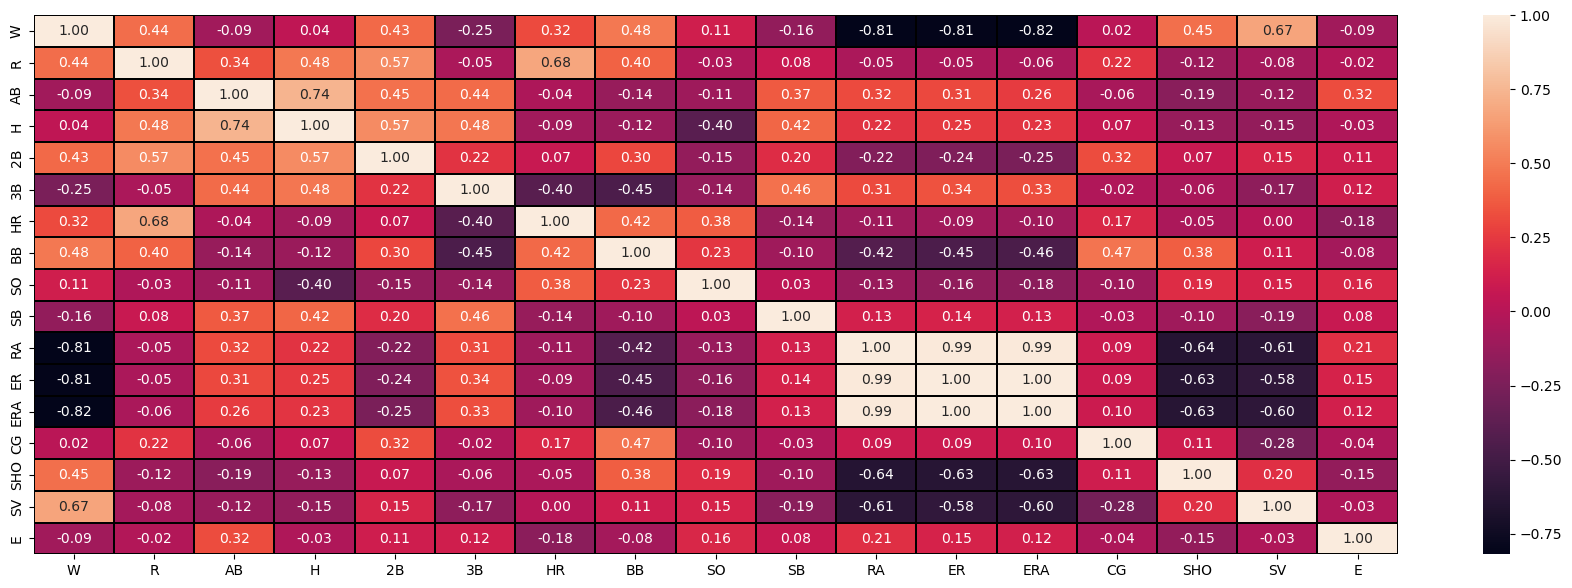

In [77]:
plt.figure(figsize=(22,7))
sns.heatmap(BB_df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [78]:
corr_matrix = BB_df.corr().abs()
corr_matrix["W"].sort_values(ascending=False)

W      1.000000
ERA    0.819600
RA     0.812952
ER     0.809435
SV     0.668831
BB     0.484342
SHO    0.448869
R      0.440955
2B     0.427797
HR     0.315421
3B     0.251118
SB     0.157234
SO     0.111850
E      0.090112
AB     0.087947
H      0.035697
CG     0.016041
Name: W, dtype: float64

Making the data ready for applying various models but diving it into dependent and independent variable. Spliting it in Test and train.



In [79]:
x = BB_df.drop(['W'], axis =1)
y = BB_df['W']

In [80]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif                            #checking the multicollinearity


VIF values Features
0     11.316511        R
1     12.294630       AB
2      8.609283        H
3      4.136437       2B
4      3.026836       3B
5     10.738194       HR
6      3.760517       BB
7      2.752590       SO
8      1.911049       SB
9    194.957674       RA
10  1807.198508       ER
11  1291.907186      ERA
12     2.709337       CG
13     3.116107      SHO
14     4.457117       SV
15     2.089600        E

In [82]:
x = x.drop(columns=['ERA','ER'])          #droping the columns beacause of high multicollinearity 

In [83]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif                         #checking the multicollinearity after dropping few columns

VIF values Features
0     9.878764        R
1     4.048508       AB
2     7.266444        H
3     3.653171       2B
4     2.747770       3B
5     7.537881       HR
6     3.425823       BB
7     2.386110       SO
8     1.715492       SB
9     5.023420       RA
10    2.454338       CG
11    2.892663      SHO
12    2.300619       SV
13    2.007231        E

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.30,random_state=39)
print('Training size:',x_train.shape)
print('Training target size:',y_train.shape)
print('Test size:',x_test.shape)
print('Test target size:',y_test.shape)

Training size: (21, 14)
Training target size: (21,)
Test size: (9, 14)
Test target size: (9,)


Applying various Regressor Model on the dataset

In [85]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Ada Boost Regressor": AdaBoostRegressor(),
    "SV": SVR(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Lassocv":LassoCV(),
    "Ridgecv":RidgeCV()
}

In [86]:
for model_name,model in models.items():
    model.fit(x_train, y_train)
    model.score(x_test,y_test)
    pred = model.predict(x_test)
    pred1= model.predict(x_train)
    print(f"{model_name}")
    print("Mean absolute Error",mean_absolute_error(y_test,pred))
    print("Mean squared error",mean_squared_error(y_test,pred))
    print("r2 Score on test data",r2_score(y_test,pred)*100)  
    print("r2 Score on training data",r2_score(y_train,pred1)*100)

Linear Regression
Mean absolute Error 4.624827916638922
Mean squared error 29.68009227434855
r2 Score on test data 80.390803636034
r2 Score on training data 90.98399708611093
KNN
Mean absolute Error 8.133333333333333
Mean squared error 79.90222222222224
r2 Score on test data 47.20978792822185
r2 Score on training data 49.88162618796201
Ada Boost Regressor
Mean absolute Error 7.780246913580247
Mean squared error 75.05561042524005
r2 Score on test data 50.41187239441726
r2 Score on training data 98.59682770151356
SV
Mean absolute Error 10.159321850539673
Mean squared error 136.62308627605
r2 Score on test data 9.735155070472656
r2 Score on training data 19.310748584496483
Random Forest Regressor
Mean absolute Error 7.514444444444446
Mean squared error 76.00925555555557
r2 Score on test data 49.78181321370309
r2 Score on training data 94.75590417106652
Extra Trees Regressor
Mean absolute Error 7.853333333333333
Mean squared error 82.88497777777779
r2 Score on test data 45.2391256117455
r2

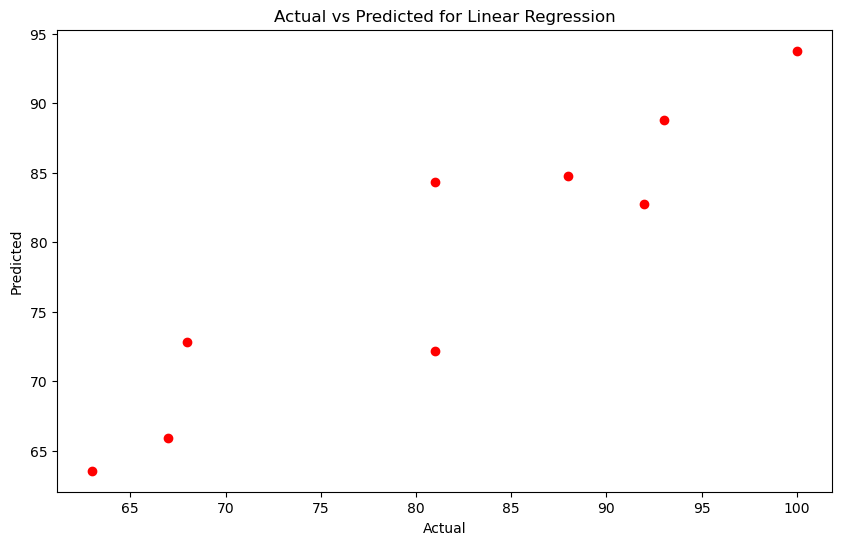

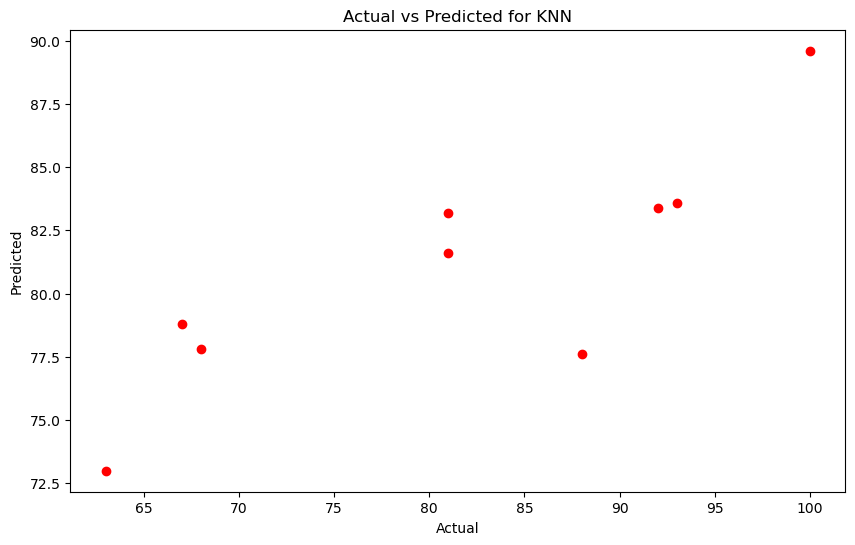

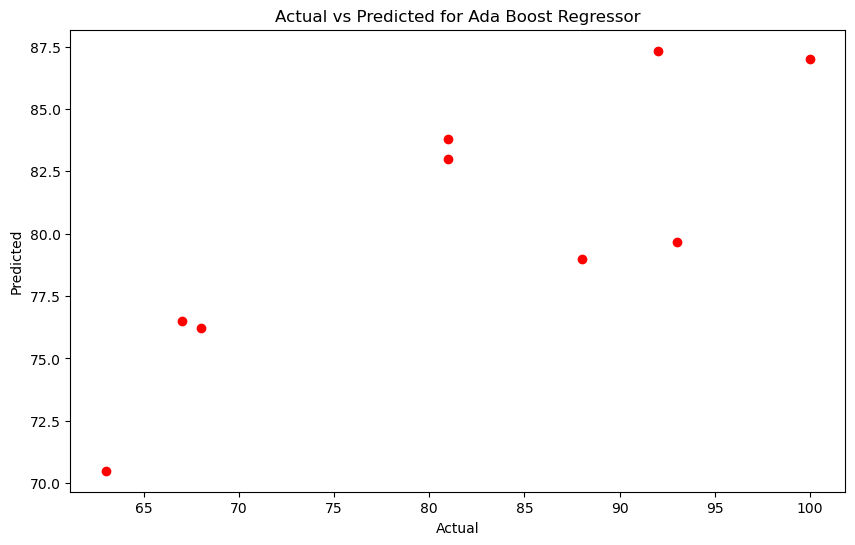

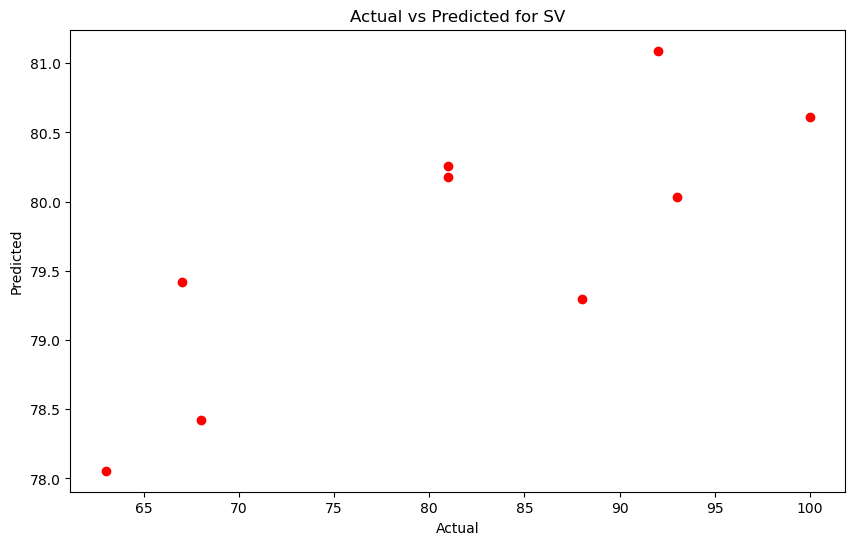

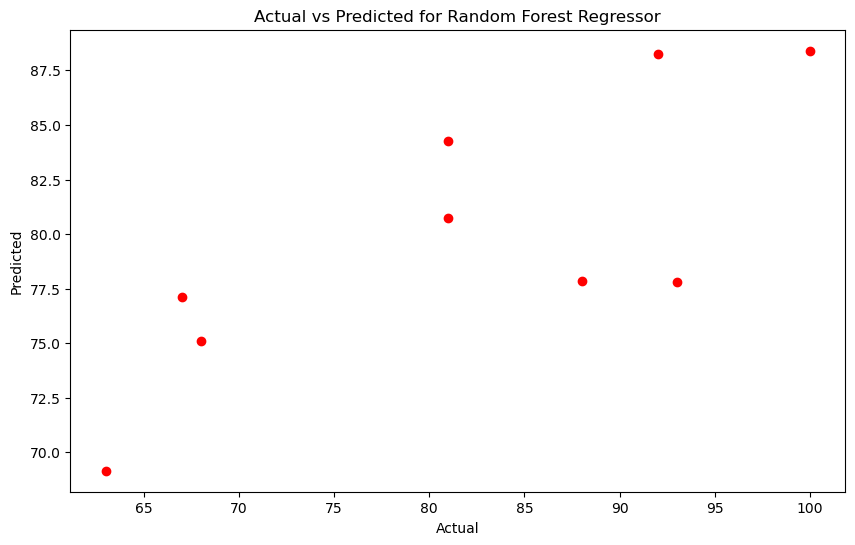

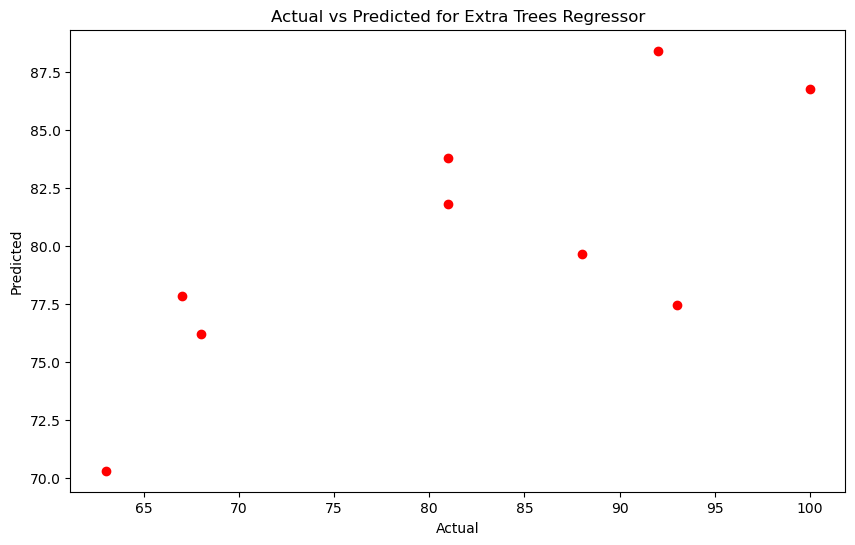

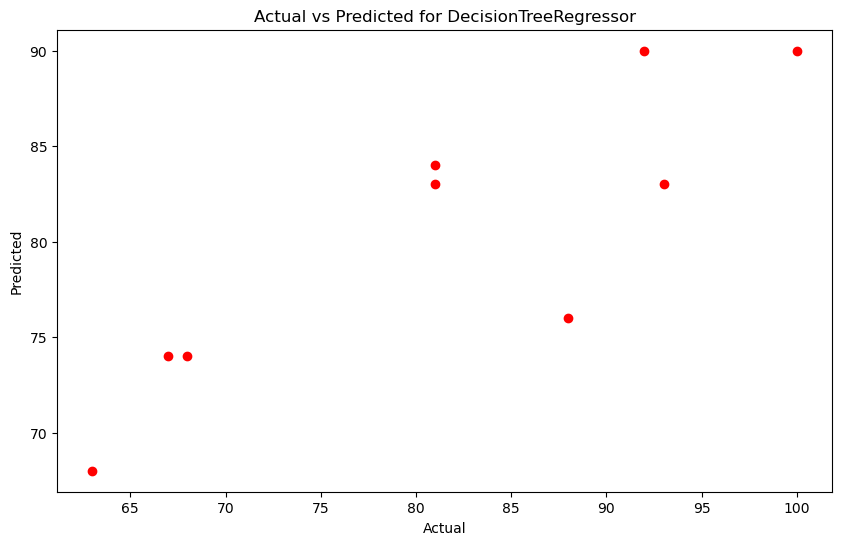

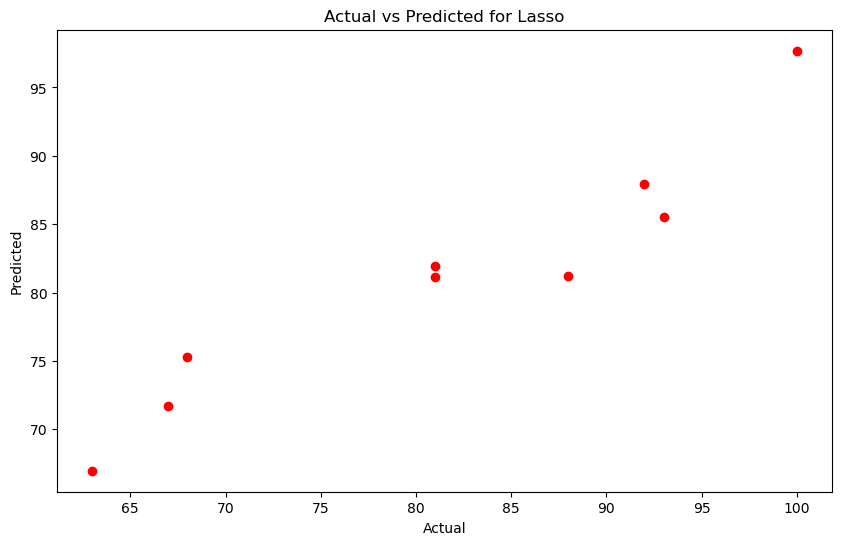

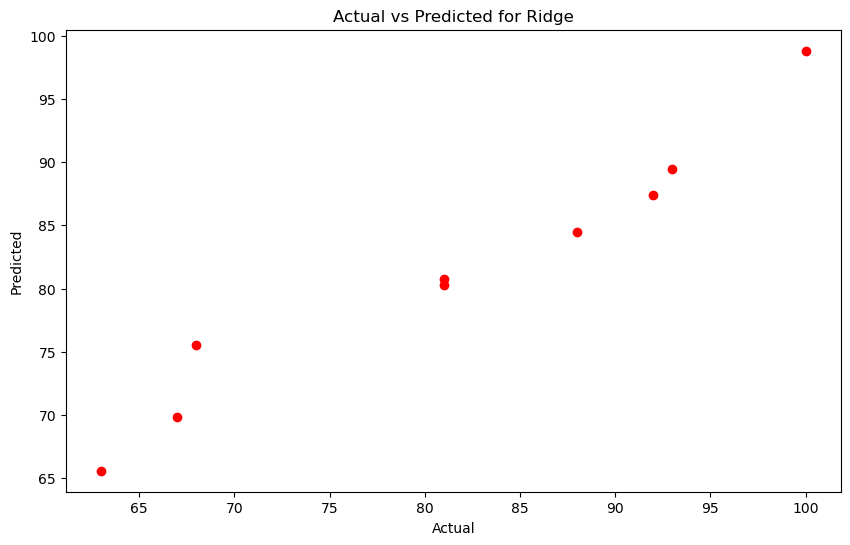

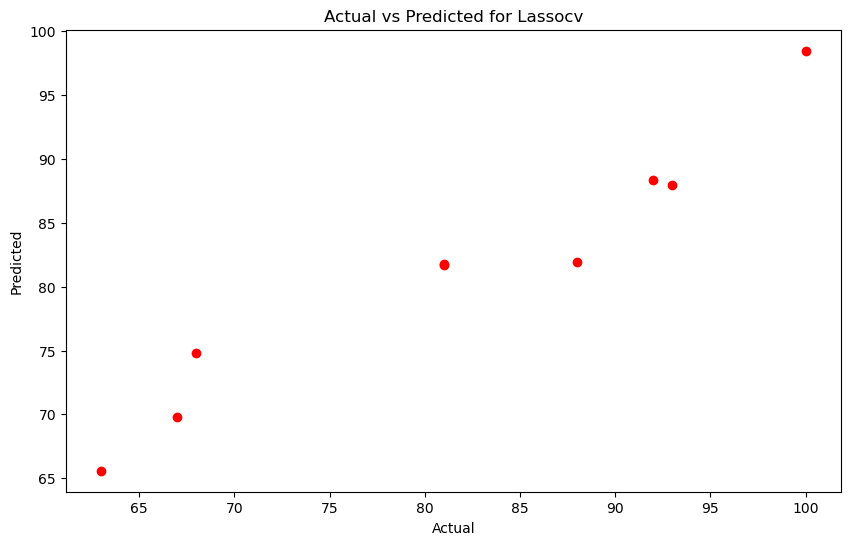

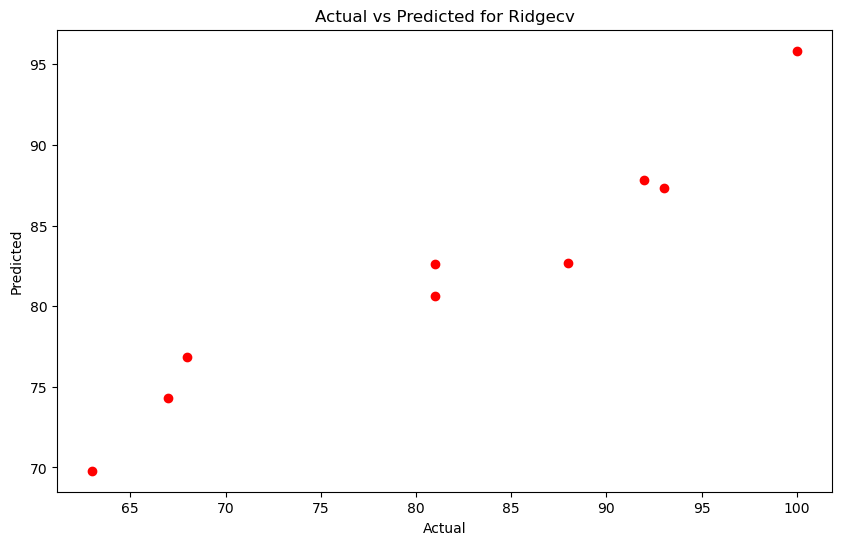

In [87]:
for model_name, model in models.items():
    pred = model.predict(x_test)
    pred1= model.predict(x_train)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, pred, color='r')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show()

In [88]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, x, y, cv=5)
    print(f"{model_name} CV mean accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Linear Regression CV mean accuracy: 0.26 ± 0.48
KNN CV mean accuracy: -0.29 ± 1.20
Ada Boost Regressor CV mean accuracy: -0.71 ± 2.13
SV CV mean accuracy: -0.39 ± 0.31
Random Forest Regressor CV mean accuracy: -0.68 ± 2.17
Extra Trees Regressor CV mean accuracy: -0.47 ± 1.57
DecisionTreeRegressor CV mean accuracy: -2.22 ± 3.92
Lasso CV mean accuracy: 0.51 ± 0.48
Ridge CV mean accuracy: 0.32 ± 0.61
Lassocv CV mean accuracy: 0.52 ± 0.52
Ridgecv CV mean accuracy: 0.33 ± 0.50


In [89]:
Ls=Lasso()

In [90]:
Ls.fit(x_train,y_train)

Lasso()

In [91]:
parameter= {'alpha':[.0001, .001, .01, .1, 1, 10]}

In [92]:
grid_GBC = GridSearchCV(Ls, parameter,cv=2)
grid_GBC.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [94]:
filename="Baseball_Model_1.pkl"
with open(filename, 'wb') as file:
    pickle.dump(Ls, file)
with open(filename, 'rb') as file:
    Final_Model = pickle.load(file)
result = Final_Model.score(x_test, y_test)
print(result)

0.8423062782963332


# FINAL SUMMARY
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.
  Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
  Output: Number of predicted wins (W).
The purpose of this project is to determine how the input variable helps in predicting the number of wins by performing exploratory data analysis and predictive modeling on the Base ball dataset. In this project following libaries are used for performing various functions on the data set:- Numpy, Pandas, Sci-kit learn,matplotlib.pyplot and seaborn.

ABOUT THE DATASET

1.W - This indicates the number of Wins credited to a pitcher.
2.R - This indicates Runs scored.
3.AB - This means At bat or time at bat.
4.H - This means Hit.
5.2B 
6.3B - This measns a Triple.
7.HR - This means Home runs.
8.BB - This means Base on balls.
9.SO - Also denoted as "K" means Strikeout.
10.SB - This means Stolen base. 
11.RA - This means Run Average. 
12.ER - This means Earned run.
13.ERA - This means Earned Run Average. 
14.CG - This means Complete Game.
15.SHO - This means Shutout. 
16.SV - This means Save. 
17.E - This means Errors.

STEPS IN INVLOVED IN THE PROCESS

Checked to number of rows n columns present in dataset.
Checking data type(as all the columns are present in both numerical and categorical form so, converted the data in numerical data).
Check for the null values in dataset and used heat map to show the same.
Performed data description in order to check mean,medain etc so, that it will be easy to understand how is skeweed.
Applied different graphs(bar,his,scatter) on the data to understand in more better way(visual form)
Check the outliers in the data and removed the same by using Zscore test.
Checked the skewness of data and removed it by using cuberoot and log transforms.
Checked the coorelation between independent variable and dependent variable.
Used train test split method to divide the data(test size is 30%).
Applied various Regressors model to check which works best on dataset and also applied cross value method to get more acurracy.
CONCLUSION lasso model works best on dataset with 84% accuracy.